In [1]:
import torch
import timm
from timm.data import create_dataset
from torchvision.datasets import CIFAR10
from torchvision import transforms
from torch.utils.data import Subset
import umap
from matplotlib import pyplot as plt

In [2]:
m = timm.create_model('resnet50', pretrained=True)

In [3]:
# No fancy transforms, we just convert the image to a tensor
transform = transforms.ToTensor()

# create training dataset
trainset = CIFAR10(root='./data', train=True, download=True, transform=transform)

Files already downloaded and verified


In [4]:
idx1 = torch.tensor(trainset.targets) == 1
idx8 = torch.tensor(trainset.targets) == 8
train_mask = idx1 | idx8
train_indices = train_mask.nonzero().reshape(-1)
train_indices

tensor([    4,     5,     8,  ..., 49993, 49998, 49999])

In [5]:
train_subset = Subset(trainset, train_indices)

In [6]:
image, label = train_subset[0]
image = torch.unsqueeze(image, dim=0)
image2, label2 = train_subset[1]
image2 = torch.unsqueeze(image2, dim=0)

In [7]:
images, _ = train_subset[0]
images = torch.unsqueeze(images, dim=0)
for i in range(1,100):
    new_image, _ = train_subset[i]
    new_image = torch.unsqueeze(new_image, dim=0)
    images = torch.cat((images, new_image), dim=0)


In [9]:
o = m.forward_features(images)

In [11]:
o_flat = torch.flatten(o, start_dim=1)

In [14]:
data = o_flat.detach().numpy()


In [15]:
reducer = umap.UMAP(random_state=42)
reducer.fit(data)

UMAP(random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [16]:
embedding = reducer.transform(data)

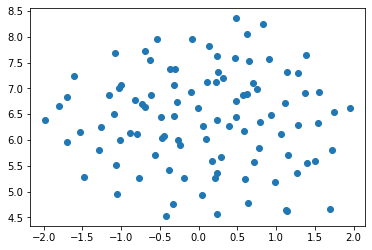

In [23]:
plt.scatter(embedding[:,0], embedding[:,1])
plt.show()